In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data load & preprocess

In [2]:
df = pd.read_csv("/content/final_data.csv")

In [3]:
df

,H,diameter,albedo,rot_per,e,a,q,i,om,w,ma,ad,n,per,moid_ld
0,3.33,939.400000,0.090000,9.074170,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,1680.0,616.00
1,4.12,513.000000,0.155000,7.813221,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,1680.0,478.00
2,5.16,246.596000,0.214000,7.210000,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,1590.0,403.00
3,3.22,525.400000,0.422800,5.342128,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,1330.0,443.00
4,7.00,106.699000,0.274000,16.806000,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,1510.0,430.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311958,26.23,-31.270931,0.116500,10.355228,0.2989,1.412,0.990,5.87,185.95,139.87,19.31,1.83,0.5876,613.0,9.53
1311959,23.36,-22.712515,0.076847,22.010418,0.2517,1.727,1.292,15.82,190.64,154.93,6.06,2.16,0.4344,829.0,117.00
1311960,18.04,-5.177840,0.090914,25.318527,0.2493,2.424,1.820,5.73,15.03,337.95,252.37,3.03,0.2611,1380.0,318.00
1311961,18.50,-7.014612,0.090800,26.064191,0.2824,2.336,1.676,8.08,355.23,5.25,231.41,3.00,0.2761,1300.0,262.00


In [4]:
df.isnull().sum()

H           0
diameter    0
albedo      0
rot_per     0
e           0
a           0
q           0
i           0
om          0
w           0
ma          0
ad          0
n           0
per         0
moid_ld     0
dtype: int64

In [5]:
y = pd.read_csv("/content/pha_map.csv")

In [6]:
y

,pha
0,0
1,0
2,0
3,0
4,0
...,...
1311958,0
1311959,0
1311960,0
1311961,0


In [7]:
y.isnull().sum()

pha    0
dtype: int64

In [8]:
X = df.drop(columns=['albedo', 'rot_per', 'e', 'a', 'q', 'om', 'w', 'ma', 'ad'])

In [9]:
X

,H,diameter,i,n,per,moid_ld
0,3.33,939.400000,10.59,0.2141,1680.0,616.00
1,4.12,513.000000,34.93,0.2138,1680.0,478.00
2,5.16,246.596000,12.99,0.2260,1590.0,403.00
3,3.22,525.400000,7.14,0.2715,1330.0,443.00
4,7.00,106.699000,5.36,0.2383,1510.0,430.00
...,...,...,...,...,...,...
1311958,26.23,-31.270931,5.87,0.5876,613.0,9.53
1311959,23.36,-22.712515,15.82,0.4344,829.0,117.00
1311960,18.04,-5.177840,5.73,0.2611,1380.0,318.00
1311961,18.50,-7.014612,8.08,0.2761,1300.0,262.00


In [ ]:
!pip install xgboost
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.3 MB/s eta 0:00:00


##Imports

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report
from imblearn.metrics import sensitivity_specificity_support

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=43)

##Training with Random forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

<ipython-input-93-74720f8e59d1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [ ]:
accuracy_score(y_test,y_pred)

0.999946644918119

In [ ]:
confusion_matrix(y_test,y_pred)

array([[261883,      7],
       [     7,    496]])

In [ ]:
roc_auc_score(y_test,y_pred)

0.9930283851133529

In [16]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 20, 30, 50],
    'class_weight': [None, 'balanced']
}

rand = RandomizedSearchCV(model, param_grid, verbose=2, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
!pip install dask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.7 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.6.4
    Uninstalling importlib-metadata-4.6.4:
      Successfully uninstalled importlib-metadata-4.6.4


In [ ]:
!python -m pip install dask distributed --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 5.3 MB/s eta 0:00:00


In [23]:
from dask.distributed import Client
client = Client(n_workers=8)
client

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35965 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.49s.  This is often caused by long-running GIL-holding functions or movin

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:35965/status,
Dashboard: http://127.0.0.1:35965/status,Workers: 8
Total threads: 8,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43829,Workers: 8
Dashboard: http://127.0.0.1:35965/status,Total threads: 8
Started: 1 minute ago,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:43943,Total threads: 1
Dashboard: http://127.0.0.1:40683/status,Memory: 1.58 GiB
Nanny: tcp://127.0.0.1:34055,


In [18]:
import joblib

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


INFO:distributed.scheduler:Receive client connection: Client-worker-6c9e52a3-2f0c-11ef-856f-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40534
INFO:distributed.scheduler:Receive client connection: Client-worker-6c9e1662-2f0c-11ef-8558-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40544
INFO:distributed.scheduler:Receive client connection: Client-worker-6c9f595c-2f0c-11ef-8574-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40546
INFO:distributed.scheduler:Receive client connection: Client-worker-6c9f7323-2f0c-11ef-851f-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40560
INFO:distributed.scheduler:Receive client connection: Client-worker-6ca299de-2f0c-11ef-8544-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40568
INFO:distributed.scheduler:Receive client connection: Client-worker-6ca4a5cf-2f0

In [ ]:
rand.best_params_


{'n_estimators': 200, 'max_depth': 20, 'class_weight': 'balanced'}

In [ ]:
rand.best_score_

0.9999618891546062

In [19]:
##Training with best parameters
rfbest = RandomForestClassifier(n_estimators= 200, max_depth= 20, class_weight='balanced')
rfbest.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.32s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.28s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.19s.  This is often caused by long-running GIL-holding functions or movi

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200)

In [20]:
y_pred = rfbest.predict(X_test)

INFO:distributed.core:Event loop was unresponsive in Nanny for 3.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.19s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts an

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261890
           1       0.98      0.99      0.98       503

    accuracy                           1.00    262393
   macro avg       0.99      0.99      0.99    262393
weighted avg       1.00      1.00      1.00    262393



INFO:distributed.core:Event loop was unresponsive in Nanny for 6.19s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts an

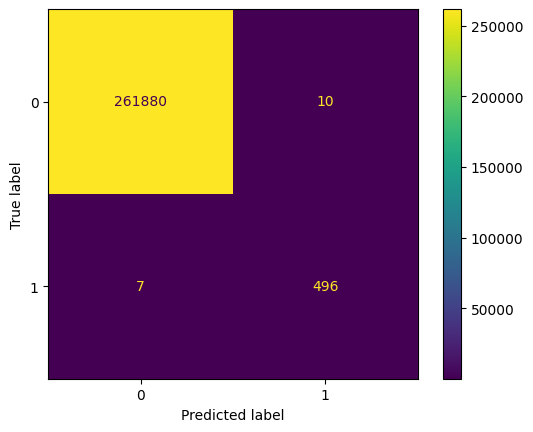

INFO:distributed.core:Event loop was unresponsive in Nanny for 4.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


In [24]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=rfbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfbest.classes_)
disp.plot()
plt.show()

INFO:distributed.core:Event loop was unresponsive in Nanny for 6.95s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 6.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.97s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 7.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

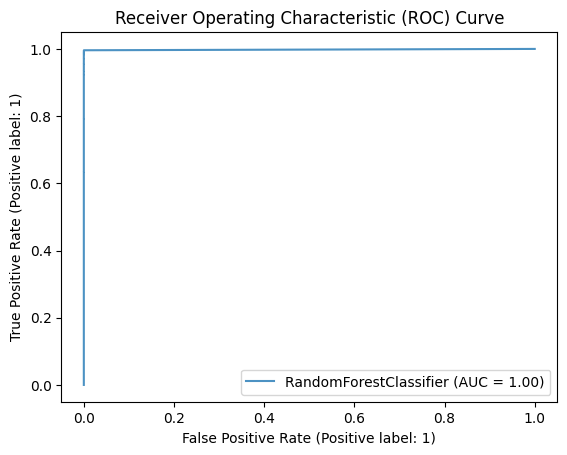

INFO:distributed.core:Event loop was unresponsive in Nanny for 3.73s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


In [25]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(rfbest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


In [27]:
sensitivity, specificity, support =sensitivity_specificity_support(y_test, y_pred)

INFO:distributed.core:Event loop was unresponsive in Nanny for 3.12s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 3.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

In [28]:
print(sensitivity, specificity, support)

[0.99996182 0.9860835 ] [0.9860835  0.99996182] [261890    503]


In [ ]:
roc_auc_score(y_test,y_pred)

0.993024566716316